In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bs4 import BeautifulSoup as soup # HTML parser
import requests # Page requests
import re # Regular expressions
import time # Time delays
import random # Random numbers

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://charlottesville.craigslist.org/search/apa#search=2~gallery~0'
raw = requests.get(url,headers=header) # Get page

housing_types= [
    'apartment', 'house', 'condo', 'duplex', 'townhouse', 'studio', 'loft', 'cottage',
    'basement', 'room', 'suite'
]


bsObj = soup(raw.content,'html.parser') # Parse the html
listings = bsObj.find_all(class_="cl-static-search-result") # Find all listings

In [44]:
data = []
for k in range(len(listings)):
    try:
        title = listings[k].find('div', class_='title').get_text(strip=True).lower()
        price = listings[k].find('div', class_='price').get_text(strip=True) if listings[k].find('div', class_='price') else "N/A"
        link = listings[k].find('a', href=True)['href']
        full_link = "https://charlottesville.craigslist.org" + link  # Convert to absolute URL

        # Get housing type from title string
        words = title.split()
        hits = [word for word in words if word in housing_types]  # Find housing type in title
        type_of_home = hits[0] if hits else 'missing'  # Store first match or 'missing'

        # Append data
        data.append({'title': title, 'price': price, 'link': full_link, 'type_of_home': type_of_home})

    except Exception as e:
        print(f"Error processing a listing: {e}")

# Convert to DataFrame
df = pd.DataFrame(data)

# Display DataFrame in Google Colab
df


Error processing a listing: name 'housing_types' is not defined
Error processing a listing: name 'housing_types' is not defined
Error processing a listing: name 'housing_types' is not defined
Error processing a listing: name 'housing_types' is not defined
Error processing a listing: name 'housing_types' is not defined
Error processing a listing: name 'housing_types' is not defined
Error processing a listing: name 'housing_types' is not defined
Error processing a listing: name 'housing_types' is not defined
Error processing a listing: name 'housing_types' is not defined
Error processing a listing: name 'housing_types' is not defined
Error processing a listing: name 'housing_types' is not defined
Error processing a listing: name 'housing_types' is not defined
Error processing a listing: name 'housing_types' is not defined
Error processing a listing: name 'housing_types' is not defined
Error processing a listing: name 'housing_types' is not defined
Error processing a listing: name 'housin

""


In [39]:
## Wrangle the data
df = pd.DataFrame.from_dict(data)
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = pd.to_numeric(df['price'],errors='coerce')
df['year'] = pd.to_numeric(df['year'],errors='coerce')
df['age'] = 2025-df['year']
print(df.shape)
df.to_csv('craigslist_cville_cars.csv')
df.head()

(114, 6)


,title,price,year,link,keywords,age
0,enjoy the luxury of your own private bedroom a...,610,NaN,https://charlottesville.craigslist.org/apa/d/c...,luxury,NaN
1,"charming 2 bedroom, 2 bathroom house ?",1100,NaN,https://charlottesville.craigslist.org/apa/d/c...,missing,NaN
2,cozy 2-br apartment,1100,NaN,https://charlottesville.craigslist.org/apa/d/w...,missing,NaN
3,small efficiency for lease,800,NaN,https://charlottesville.craigslist.org/apa/d/s...,missing,NaN
4,renovated brick home**,900,NaN,https://charlottesville.craigslist.org/apa/d/c...,missing,NaN


from matplotlib import pyplot as plt
_df_0['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('link').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('keywords').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('link')):
  _plot_series(series, series_name, i)
  fig.legend(title='link', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('keywords')):
  _plot_series(series, series_name, i)
  fig.legend(title='keywords', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('price')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['link'].value_counts()
    for x_label, grp in _df_9.groupby('title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('title')
_ = plt.ylabel('link')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['keywords'].value_counts()
    for x_label, grp in _df_10.groupby('link')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('link')
_ = plt.ylabel('keywords')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='price', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['link'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='price', y='link', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['keywords'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='price', y='keywords', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

count       76.000000
mean     10488.157895
std      12103.354544
min        900.000000
25%       3000.000000
50%       6875.000000
75%      12150.000000
max      62800.000000
Name: price, dtype: float64


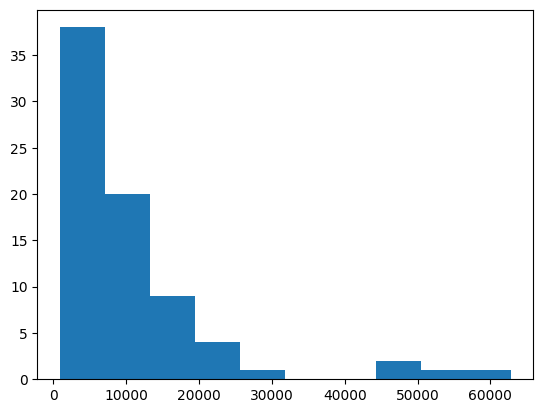

count    72.000000
mean     25.180556
std      18.144433
min       3.000000
25%      14.000000
50%      18.000000
75%      30.250000
max      76.000000
Name: age, dtype: float64


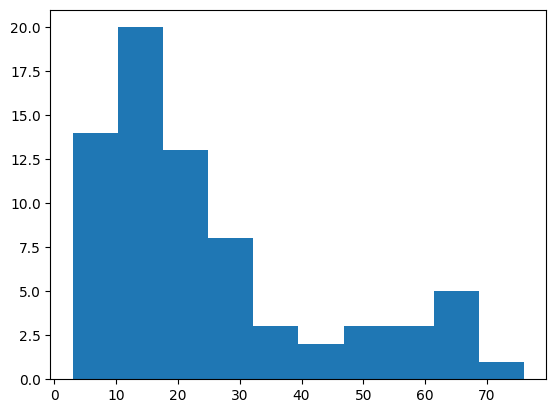

In [21]:
# EDA for price and age:
print(df['price'].describe())
df['price'].hist(grid=False)
plt.show()
print(df['age'].describe())
df['age'].hist(grid=False)
plt.show()

In [22]:
# Price by brand:
df.loc[:,['price','brand']].groupby('brand').describe()

price                                                         \
           count          mean           std      min      25%      50%   
brand                                                                     
acura        1.0   2300.000000           NaN   2300.0   2300.0   2300.0   
bmw          6.0  17116.666667  15688.902660   7200.0   8000.0  10750.0   
cadillac     1.0   2950.000000           NaN   2950.0   2950.0   2950.0   
chevrolet    3.0  16300.000000  10849.884792   4900.0  11200.0  17500.0   
chevy        5.0   7680.000000   5436.520027   2000.0   2200.0   9850.0   
dodge        4.0   5012.500000   3644.716496   1500.0   2100.0   4900.0   
ford         7.0  14300.000000  16804.166150   1000.0   4900.0   6000.0   
honda        6.0   7833.333333   5759.050848   2000.0   4750.0   6500.0   
jeep         4.0   2225.000000   2189.558555    900.0   1162.5   1250.0   
kia          1.0   6550.000000           NaN   6550.0   6550.0   6550.0   
mazda        1.0   7500.000000           NaN   7500.0   7500.0   7500.0   
missing     28.0  11478.571429  14914.009252   1000.0   3000.0   5875.0   
mitsubishi   1.0   6400.000000           NaN   6400.0   6400.0   6400.0   
subaru       2.0   8950.000000   5161.879503   5300.0   7125.0   8950.0   
tesla        1.0  25000.000000           NaN  25000.0  25000.0  25000.0   
toyota       4.0   6775.000000   3630.771268   2000.0   5375.0   7200.0   
volkswagen   1.0  13950.000000           NaN  13950.0  13950.0  13950.0   

                              
                75%      max  
brand                         
acura        2300.0   2300.0  
bmw         16875.0  48000.0  
cadillac     2950.0   2950.0  
chevrolet   22000.0  26500.0  
chevy        9850.0  14500.0  
dodge        7812.5   8750.0  
ford        16900.0  49500.0  
honda        8625.0  18500.0  
jeep         2312.5   5500.0  
kia          6550.0   6550.0  
mazda        7500.0   7500.0  
missing     12500.0  62800.0  
mitsubishi   6400.0   6400.0  
subaru      10775.0  12600.0  
tesla       25000.0  25000.0  
toyota       8600.0  10700.0  
volkswagen  13950.0  13950.0

In [23]:
# Age by brand:
df.loc[:,['age','brand']].groupby('brand').describe()

age                                                      
           count       mean        std   min    25%   50%    75%   max
brand                                                                 
acura        1.0  17.000000        NaN  17.0  17.00  17.0  17.00  17.0
bmw          5.0  10.400000   5.504544   3.0   6.00  14.0  14.00  15.0
cadillac     1.0  19.000000        NaN  19.0  19.00  19.0  19.00  19.0
chevrolet    3.0  23.333333  15.631165   9.0  15.00  21.0  30.50  40.0
chevy        5.0  21.600000  10.784248  10.0  17.00  17.0  26.00  38.0
dodge        4.0  33.000000  16.472199  17.0  25.25  29.5  37.25  56.0
ford         7.0  26.000000  22.678918   9.0  16.00  17.0  24.00  76.0
honda        5.0  11.200000   5.848077   3.0   9.00  12.0  13.00  19.0
jeep         3.0  18.333333   5.859465  14.0  15.00  16.0  20.50  25.0
kia          1.0  13.000000        NaN  13.0  13.00  13.0  13.00  13.0
mazda        1.0  18.000000        NaN  18.0  18.00  18.0  18.00  18.0
missing     27.0  35.518519  20.748254   7.0  19.00  30.0  52.50  68.0
mitsubishi   1.0  17.000000        NaN  17.0  17.00  17.0  17.00  17.0
subaru       2.0   9.500000   0.707107   9.0   9.25   9.5   9.75  10.0
tesla        1.0   7.000000        NaN   7.0   7.00   7.0   7.00   7.0
toyota       4.0  19.750000   3.593976  17.0  17.75  18.5  20.50  25.0
volkswagen   1.0  10.000000        NaN  10.0  10.00  10.0  10.00  10.0

In [24]:
df.loc[ df['brand']=='audi',:]

,title,price,year,link,brand,age


<Axes: xlabel='age', ylabel='price'>

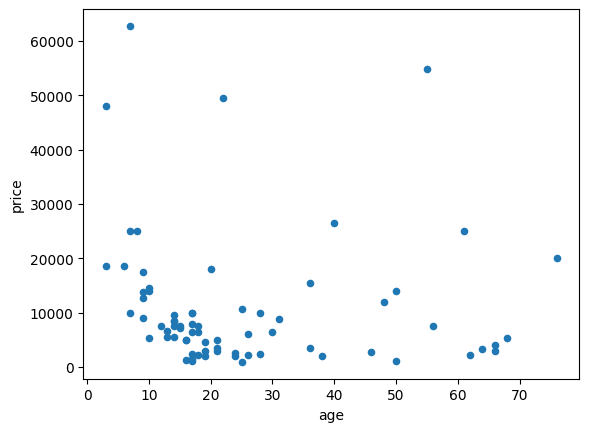

In [25]:
df.plot.scatter('age','price')

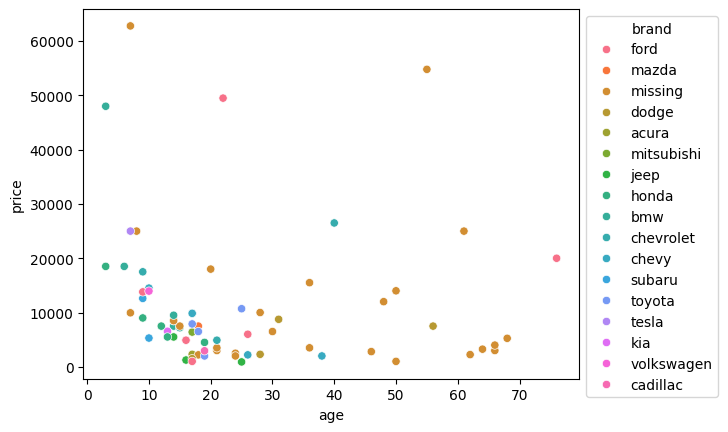

In [26]:
ax = sns.scatterplot(data=df, x='age', y='price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

           log_price   log_age
log_price   0.957550 -0.211312
log_age    -0.211312  0.511297
           log_price   log_age
log_price   1.000000 -0.303835
log_age    -0.303835  1.000000


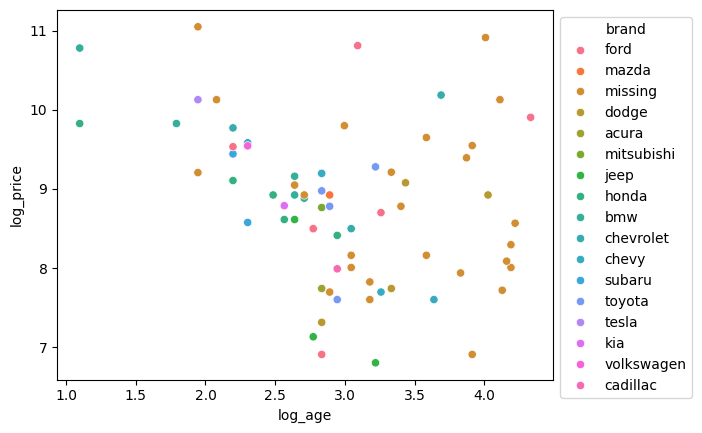

In [27]:
df['log_price'] = np.log(df['price'])
df['log_age'] = np.log(df['age'])

ax = sns.scatterplot(data=df, x='log_age', y='log_price',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

print(df.loc[:,['log_price','log_age']].cov())
print(df.loc[:,['log_price','log_age']].corr())

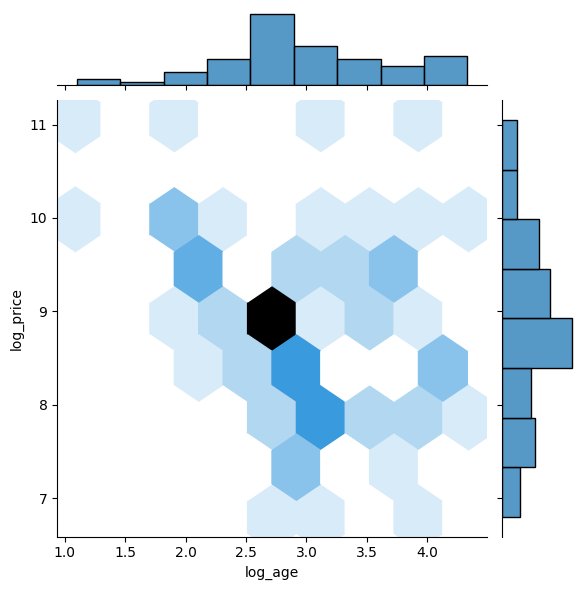

In [28]:
sns.jointplot(data=df, x='log_age', y='log_price',kind='hex')

In [29]:
df.head()

,title,price,year,link,brand,age,log_price,log_age
0,2009 ford focus ses,4900,2009.0,https://charlottesville.craigslist.org/cto/d/c...,ford,16.0,8.496990,2.772589
1,1999 ford e-250 5.4,6000,1999.0,https://charlottesville.craigslist.org/cto/d/c...,ford,26.0,8.699515,3.258097
2,2007 mazda miata grand touring,7500,2007.0,https://charlottesville.craigslist.org/cto/d/c...,mazda,18.0,8.922658,2.890372
3,1959 amc rambler american (2 of 2),3000,1959.0,https://charlottesville.craigslist.org/cto/d/q...,missing,66.0,8.006368,4.189655
4,1959 amc rambler american (1 of 2),4000,1959.0,https://charlottesville.craigslist.org/cto/d/q...,missing,66.0,8.294050,4.189655


In [30]:
links = df['link']
data = []
for link in links: # about 3 minutes
    time.sleep(random.randint(1, 3))
    raw = requests.get(link,headers=header) # Get page
    bsObj = soup(raw.content,'html.parser') # Parse the html
    #
    try:
        year_post = bsObj.find(class_='attr important').find(class_ = 'valu year').get_text()
    except:
        year_post = np.nan
    #
    try:
        condition = bsObj.find(class_='attr condition').find(href=True).get_text()
    except:
        condition = 'missing'
    #
    try:
        cylinders = bsObj.find(class_='attr auto_cylinders').find(class_ = 'valu').get_text()
        cylinders = cylinders.replace('\n','')
    except:
        cylinders = 'missing'
    #
    try:
        drivetrain = bsObj.find(class_='attr auto_drivetrain').find(href=True).get_text()
    except:
        drivetrain = 'missing'
    #
    try:
        fuel = bsObj.find(class_='attr auto_fuel_type').find(href = True).get_text()
    except:
        fuel = 'missing'
    #
    try:
        miles = bsObj.find(class_='attr auto_miles').find(class_ = 'valu').get_text()
    except:
        miles = np.nan
    #
    try:
        color = bsObj.find(class_='attr auto_paint').find(href=True).get_text()
    except:
        color='missing'
    #
    try:
        title = bsObj.find(class_='attr auto_title_status').find(href=True).get_text()
    except:
        title='missing'
    #
    try:
        transmission = bsObj.find(class_='attr auto_transmission').find(href=True).get_text()
    except:
        transmission = 'missing'
    #
    try:
        bodytype = bsObj.find(class_='attr auto_bodytype').find(href=True).get_text()
    except:
        bodytype = 'missing'
    text = bsObj.find(id='postingbody').get_text()
    text = text.replace('\n','')
    text = text.replace('QR Code Link to This Post','')
    record = {'title':title,
              'year_post':year_post,
              'condition':condition,
              'cylinders':cylinders,
              'drivetrain':drivetrain,
              'fuel':fuel,
              'miles':miles,
              'color':color,
              'title':'title',
              'transmission':transmission,
              'bodytype':bodytype,
              'text':text,}
    data.append(record)

In [31]:
new_df = pd.DataFrame.from_dict(data)
new_df.head()

,title,year_post,condition,cylinders,drivetrain,fuel,miles,color,transmission,bodytype,text
0,title,2009,good,4 cylinders,missing,gas,"106,692",blue,automatic,hatchback,"2009 Ford Focus for sale. Has 106,692 origina..."
1,title,1999,fair,8 cylinders,rwd,gas,"206,000",white,automatic,van,Great running work van. Everything works needs...
2,title,2007,excellent,4 cylinders,rwd,gas,"103,000",black,automatic,convertible,Beautiful and sporty convertible in great cond...
3,title,1959,good,6 cylinders,rwd,gas,"50,922",black,manual,missing,"""Lucy""If this ad is here, it's available. Pri..."
4,title,1959,good,6 cylinders,rwd,gas,"48,404",green,manual,missing,"""Ricky""If this ad is here, it's available. The..."


In [32]:
new_df.shape

(76, 11)

In [33]:
df = pd.concat([df,new_df],axis=1) # combine data frames
df.head()

,title,price,year,link,brand,age,log_price,log_age,title,year_post,condition,cylinders,drivetrain,fuel,miles,color,transmission,bodytype,text
0,2009 ford focus ses,4900,2009.0,https://charlottesville.craigslist.org/cto/d/c...,ford,16.0,8.496990,2.772589,title,2009,good,4 cylinders,missing,gas,"106,692",blue,automatic,hatchback,"2009 Ford Focus for sale. Has 106,692 origina..."
1,1999 ford e-250 5.4,6000,1999.0,https://charlottesville.craigslist.org/cto/d/c...,ford,26.0,8.699515,3.258097,title,1999,fair,8 cylinders,rwd,gas,"206,000",white,automatic,van,Great running work van. Everything works needs...
2,2007 mazda miata grand touring,7500,2007.0,https://charlottesville.craigslist.org/cto/d/c...,mazda,18.0,8.922658,2.890372,title,2007,excellent,4 cylinders,rwd,gas,"103,000",black,automatic,convertible,Beautiful and sporty convertible in great cond...
3,1959 amc rambler american (2 of 2),3000,1959.0,https://charlottesville.craigslist.org/cto/d/q...,missing,66.0,8.006368,4.189655,title,1959,good,6 cylinders,rwd,gas,"50,922",black,manual,missing,"""Lucy""If this ad is here, it's available. Pri..."
4,1959 amc rambler american (1 of 2),4000,1959.0,https://charlottesville.craigslist.org/cto/d/q...,missing,66.0,8.294050,4.189655,title,1959,good,6 cylinders,rwd,gas,"48,404",green,manual,missing,"""Ricky""If this ad is here, it's available. The..."


In [34]:
df.dtypes

,0
title,object
price,int64
year,float64
link,object
brand,object
age,float64
log_price,float64
log_age,float64
title,object
year_post,object


In [35]:
df['miles'] = df['miles'].str.replace(',','')
df['miles'] = pd.to_numeric(df['miles'],errors='coerce')

df['year_post'] = df['year_post'].str.replace(',','')
df['year_post'] = pd.to_numeric(df['year_post'],errors='coerce')
df.to_csv('craiglist_cville_cars_long.csv')

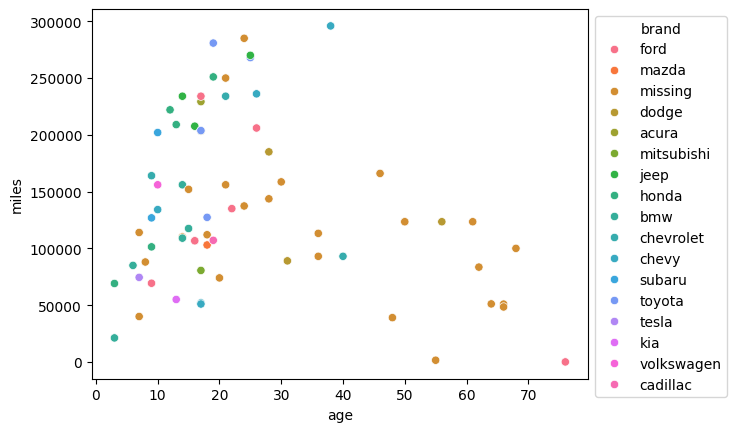

In [36]:
ax = sns.scatterplot(data=df, x='age', y='miles',hue='brand')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))